In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [17]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Lampung/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

LAMPUNG_VOWEL_SIGN_U.png 2437962
LAMPUNG_VOWEL_SIGN_O.png 2383911
LAMPUNG_LETTER_LA.png 650955
LAMPUNG_LETTER_MA.png 734028
LAMPUNG_LETTER_NYA.png 904506
LAMPUNG_LETTER_PA.png 608454
LAMPUNG_LETTER_NA.png 738282
LAMPUNG_LETTER_RA.png 953601
LAMPUNG_LETTER_NGA.png 770109
LAMPUNG_LETTER_KA.png 730059
LAMPUNG_CONSONANT_SIGN_H.png 8020440
LAMPUNG_LETTER_BA.png 739485
LAMPUNG_CONSONANT_SIGN_R.png 4013157
LAMPUNG_LETTER_DA.png 807912
LAMPUNG_CONSONANT_SIGN_N.png 4910142
LAMPUNG_LETTER_GHA.png 974892
LAMPUNG_LETTER_A.png 766119
LAMPUNG_CONSONANT_SIGN_NG.png 2455233
LAMPUNG_LETTER_GA.png 598125
LAMPUNG_LETTER_CA.png 979752
LAMPUNG_LETTER_JA.png 858336
LAMPUNG_LETTER_HA.png 800844
LAMPUNG_VOWEL_SIGN_I.png 3757146
LAMPUNG_LETTER_YA.png 829509
LAMPUNG_LETTER_TA.png 888495
LAMPUNG_VOWEL_SIGN_AU.png 3739443
LAMPUNG_LETTER_SA.png 717651
LAMPUNG_LETTER_WA.png 819363
LAMPUNG_VOWEL_SIGN_E_BICEK.png 2370324
LAMPUNG_VOWEL_SIGN_E.png 3742098
LAMPUNG_VOWEL_SIGN_AI.png 2660079
LAMPUNG_SIGN_VIRAMA.png 574391

In [18]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [19]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Lampung/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

LAMPUNG_VOWEL_SIGN_U.png 2437962
LAMPUNG_VOWEL_SIGN_O.png 2383911
LAMPUNG_LETTER_LA.png 650955
LAMPUNG_LETTER_MA.png 734028
LAMPUNG_LETTER_NYA.png 904506
LAMPUNG_LETTER_PA.png 608454
LAMPUNG_LETTER_NA.png 738282
LAMPUNG_LETTER_RA.png 953601
LAMPUNG_LETTER_NGA.png 770109
LAMPUNG_LETTER_KA.png 730059
LAMPUNG_CONSONANT_SIGN_H.png 8020440
LAMPUNG_LETTER_BA.png 739485
LAMPUNG_CONSONANT_SIGN_R.png 4013157
LAMPUNG_LETTER_DA.png 807912
LAMPUNG_CONSONANT_SIGN_N.png 4910142
LAMPUNG_LETTER_GHA.png 974892
LAMPUNG_LETTER_A.png 766119
LAMPUNG_CONSONANT_SIGN_NG.png 2455233
LAMPUNG_LETTER_GA.png 598125
LAMPUNG_LETTER_CA.png 979752
LAMPUNG_LETTER_JA.png 858336
LAMPUNG_LETTER_HA.png 800844
LAMPUNG_VOWEL_SIGN_I.png 3757146
LAMPUNG_LETTER_YA.png 829509
LAMPUNG_LETTER_TA.png 888495
LAMPUNG_VOWEL_SIGN_AU.png 3739443
LAMPUNG_LETTER_SA.png 717651
LAMPUNG_LETTER_WA.png 819363
LAMPUNG_VOWEL_SIGN_E_BICEK.png 2370324
LAMPUNG_VOWEL_SIGN_E.png 3742098
LAMPUNG_VOWEL_SIGN_AI.png 2660079
LAMPUNG_SIGN_VIRAMA.png 574391

In [20]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [22]:
lampung = glob.glob("/content/drive/MyDrive/AKSARA/Lampung/*")

for huruf in lampung:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D37D60>: 100%|██████████| 20/20 [00:00<00:00, 81.66 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D37A30>: 100%|██████████| 20/20 [00:00<00:00, 57.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D3D910>: 100%|██████████| 20/20 [00:00<00:00, 84.86 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D81DB08B0>: 100%|██████████| 20/20 [00:00<00:00, 77.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D82A1C160>: 100%|██████████| 20/20 [00:00<00:00, 69.67 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D4D9A0>: 100%|██████████| 20/20 [00:00<00:00, 74.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D53BB0>: 100%|██████████| 20/20 [00:00<00:00, 80.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D53C40>: 100%|██████████| 20/20 [00:00<00:00, 78.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D5F070>: 100%|██████████| 20/20 [00:00<00:00, 72.93 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D5A700>: 100%|██████████| 20/20 [00:00<00:00, 76.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_CONSONANT_SIGN_H/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D688E0>: 100%|██████████| 20/20 [00:00<00:00, 66.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D5FCA0>: 100%|██████████| 20/20 [00:00<00:00, 75.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_CONSONANT_SIGN_R/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D68E20>: 100%|██████████| 20/20 [00:00<00:00, 76.83 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D63310>: 100%|██████████| 20/20 [00:00<00:00, 80.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_CONSONANT_SIGN_N/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D81DB0C10>: 100%|██████████| 20/20 [00:00<00:00, 65.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_GHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E4ED9A0>: 100%|██████████| 20/20 [00:00<00:00, 72.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D68E20>: 100%|██████████| 20/20 [00:00<00:00, 73.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_CONSONANT_SIGN_NG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E4F5DF0>: 100%|██████████| 20/20 [00:00<00:00, 83.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D81DB04F0>: 100%|██████████| 20/20 [00:00<00:00, 75.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D80D4DA00>: 100%|██████████| 20/20 [00:00<00:00, 73.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E4EB4F0>: 100%|██████████| 20/20 [00:00<00:00, 70.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E4FEDF0>: 100%|██████████| 20/20 [00:00<00:00, 68.09 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E50A7C0>: 100%|██████████| 20/20 [00:00<00:00, 77.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D81DB0730>: 100%|██████████| 20/20 [00:00<00:00, 80.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E50A430>: 100%|██████████| 20/20 [00:00<00:00, 67.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_AU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D81DB0490>: 100%|██████████| 20/20 [00:00<00:00, 70.19 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E511730>: 100%|██████████| 20/20 [00:00<00:00, 73.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E5113D0>: 100%|██████████| 20/20 [00:00<00:00, 81.33 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_E_BICEK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E515F70>: 100%|██████████| 20/20 [00:00<00:00, 80.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E518880>: 100%|██████████| 20/20 [00:00<00:00, 74.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E51F9A0>: 100%|██████████| 20/20 [00:00<00:00, 72.19 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_SIGN_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F2D7E51FD90>: 100%|██████████| 20/20 [00:00<00:00, 66.01 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Jawa/' + i)''' 

In [28]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Lampung/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [29]:
len(x)

672

In [30]:
len(set(y))

32

In [31]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
del z
x = np.asarray(x).astype(float)
y = np.asarray(y)

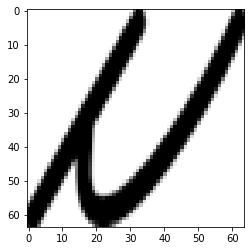

In [32]:
import random
plt.imshow(x[120])

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(units = 32, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
722/722 [==============================] - 7s 10ms/step - loss: 2.3033 - accuracy: 0.4619 - val_loss: 0.9582 - val_accuracy: 0.7293
Epoch 2/20
722/722 [==============================] - 6s 9ms/step - loss: 0.4905 - accuracy: 0.8407 - val_loss: 0.7039 - val_accuracy: 0.7762
Epoch 3/20
722/722 [==============================] - 6s 8ms/step - loss: 0.3000 - accuracy: 0.9003 - val_loss: 0.8355 - val_accuracy: 0.7624
Epoch 4/20
722/722 [==============================] - 6s 9ms/step - loss: 0.2037 - accuracy: 0.9370 - val_loss: 0.7027 - val_accuracy: 0.7873
Epoch 5/20
722/722 [==============================] - 6s 9ms/step - loss: 0.1874 - accuracy: 0.9328 - val_loss: 0.4954 - val_accuracy: 0.8370
Epoch 6/20
722/722 [==============================] - 6s 9ms/step - loss: 0.1023 - accuracy: 0.9647 - val_loss: 0.5513 - val_accuracy: 0.8370
Epoch 7/20
722/722 [==============================] - 6s 8ms/step - loss: 0.0891 - accuracy: 0.9695 - val_loss: 0.6116 - val_accuracy: 0.8453
Epoch

KeyboardInterrupt: ignored

In [34]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
302/302 [==============================] - 3s 7ms/step - loss: 1.7276 - accuracy: 0.4934 - val_loss: 0.5604 - val_accuracy: 0.7647
Epoch 2/2
302/302 [==============================] - 2s 6ms/step - loss: 0.3698 - accuracy: 0.8460 - val_loss: 0.5136 - val_accuracy: 0.7794
-> 1
Epoch 1/2
302/302 [==============================] - 2s 6ms/step - loss: 0.3017 - accuracy: 0.8891 - val_loss: 0.2026 - val_accuracy: 0.8824
Epoch 2/2
302/302 [==============================] - 2s 6ms/step - loss: 0.2483 - accuracy: 0.8957 - val_loss: 0.3066 - val_accuracy: 0.8971
-> 2
Epoch 1/2
302/302 [==============================] - 2s 6ms/step - loss: 0.2414 - accuracy: 0.8874 - val_loss: 0.2857 - val_accuracy: 0.8824
Epoch 2/2
302/302 [==============================] - 2s 6ms/step - loss: 0.1985 - accuracy: 0.8874 - val_loss: 0.2153 - val_accuracy: 0.8824
-> 3
Epoch 1/2
302/302 [==============================] - 2s 6ms/step - loss: 0.1873 - accuracy: 0.9156 - val_loss: 0.1940 - val_accuracy: 

In [40]:
model.save_weights("/content/drive/MyDrive/AKSARA/Model/Model_Lampung_FIX.h5")

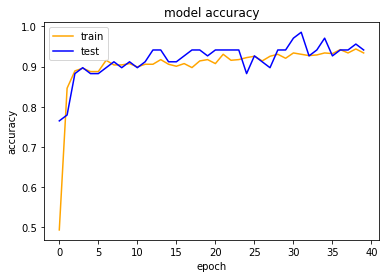

In [35]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

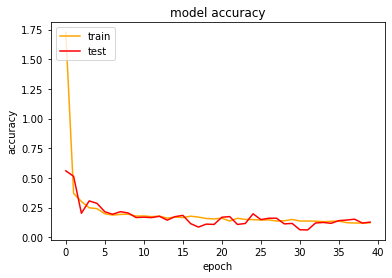

In [36]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

21/21 [==============================] - 1s 24ms/step
0.9538690476190477
[[10  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        21
          13  

In [39]:
daftar_huruf[0]

'/content/drive/MyDrive/AKSARA/Lampung/LAMPUNG_VOWEL_SIGN_U'

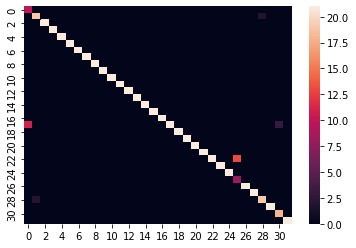

In [38]:
import seaborn as sns

sns.heatmap(cm)